In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df["Deck"] = df["Cabin"].apply(lambda x: str(x)[:1])

In [5]:
df["Side"] = df["Cabin"].apply(lambda x: str(x)[-1:])

In [6]:
df["Group"] = df["PassengerId"].apply(lambda x: str(x)[:4])

In [7]:
df["CabinNum"] = df["Cabin"].apply(lambda x: str(x)[2:-2])

In [8]:
df["CabinNum"] = df["CabinNum"].apply(lambda x:int(x) if x.isdigit() else np.nan)

In [9]:
df["FamilyName"] = df["Name"].apply(lambda x: str(x).split()[-1])

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Group,CabinNum,FamilyName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0001,0.0,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0002,0.0,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0003,0.0,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0003,0.0,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,0004,1.0,Santantines


In [11]:
dt = df.groupby("Group")["FamilyName"].nunique()
df["IsGroupFamilyOnly"] = df.merge(dt, on="Group", how="left")["FamilyName_y"].values
df["IsGroupFamilyOnly"]=df["IsGroupFamilyOnly"].map(lambda x: 1 if x == 1 else 0)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Group,CabinNum,FamilyName,IsGroupFamilyOnly
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0001,0.0,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0002,0.0,Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0003,0.0,Susent,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0003,0.0,Susent,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,0004,1.0,Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P,9276,98.0,Noxnuther,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S,9278,1499.0,Mondalley,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S,9279,1500.0,Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S,9280,608.0,Hontichre,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   HomePlanet         8492 non-null   object 
 2   CryoSleep          8476 non-null   object 
 3   Cabin              8494 non-null   object 
 4   Destination        8511 non-null   object 
 5   Age                8514 non-null   float64
 6   VIP                8490 non-null   object 
 7   RoomService        8512 non-null   float64
 8   FoodCourt          8510 non-null   float64
 9   ShoppingMall       8485 non-null   float64
 10  Spa                8510 non-null   float64
 11  VRDeck             8505 non-null   float64
 12  Name               8493 non-null   object 
 13  Transported        8693 non-null   bool   
 14  Deck               8693 non-null   object 
 15  Side               8693 non-null   object 
 16  Group              8693 

In [13]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,IsGroupFamilyOnly
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671,0.864604
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226,0.342166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000,1.000000


In [35]:
cat_cols = df.select_dtypes(include=['object',"category"])
num_cols = df.drop("IsGroupFamilyOnly",axis=1).select_dtypes(exclude=['object',"category"])

<Axes: >

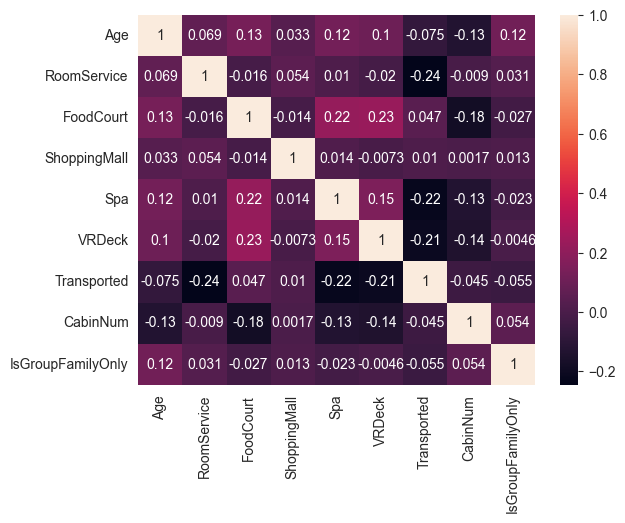

In [15]:
sns.heatmap(num_cols.corr(), annot=True)

<Axes: xlabel='Transported', ylabel='count'>

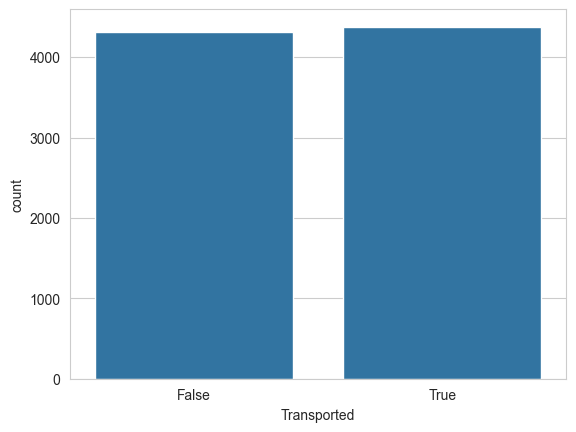

In [16]:
sns.countplot(df,x="Transported")

<Axes: xlabel='Age', ylabel='Count'>

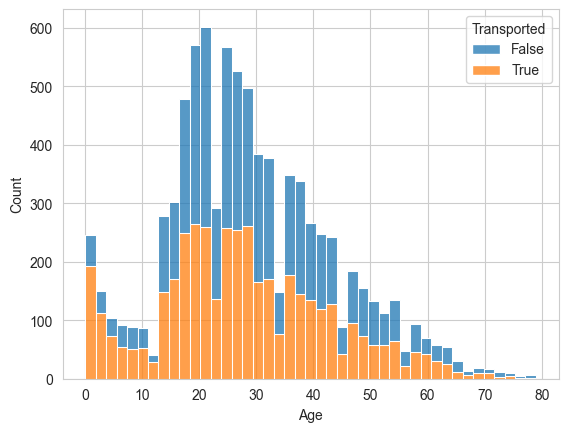

In [17]:
sns.histplot(df,x="Age",hue="Transported",multiple="stack")

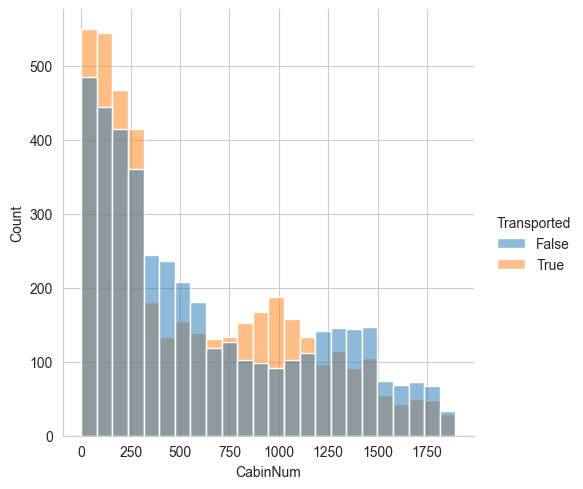

In [18]:
sns.displot(df,x="CabinNum",hue="Transported")

<Axes: xlabel='CryoSleep', ylabel='count'>

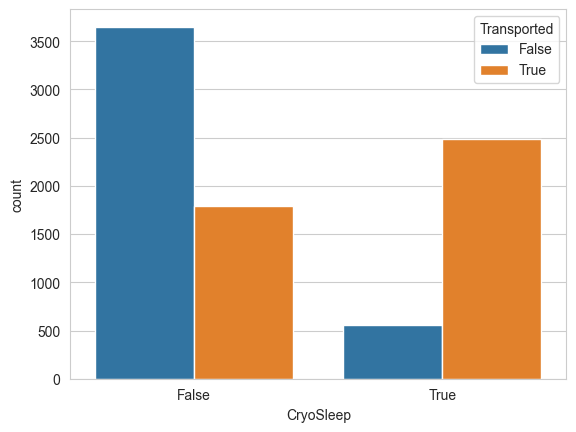

In [19]:
sns.countplot(df,x="CryoSleep",hue="Transported",)

<Axes: xlabel='CryoSleep', ylabel='Age'>

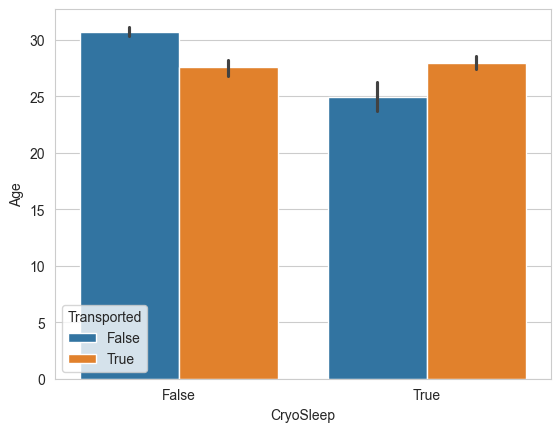

In [20]:
sns.barplot(df,x="CryoSleep",y="Age",hue="Transported",)

<Axes: xlabel='HomePlanet', ylabel='count'>

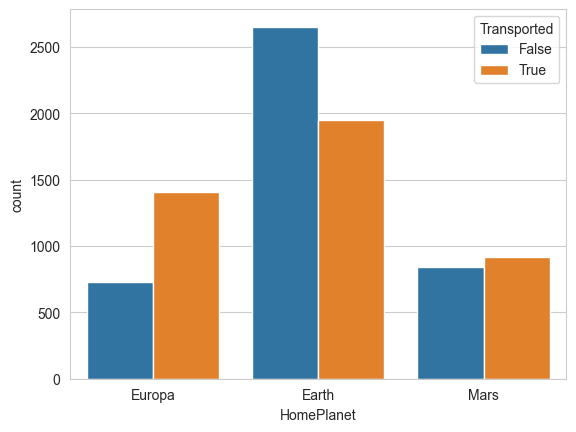

In [21]:
sns.countplot(df,x="HomePlanet",hue="Transported")

<Axes: xlabel='CryoSleep', ylabel='Transported'>

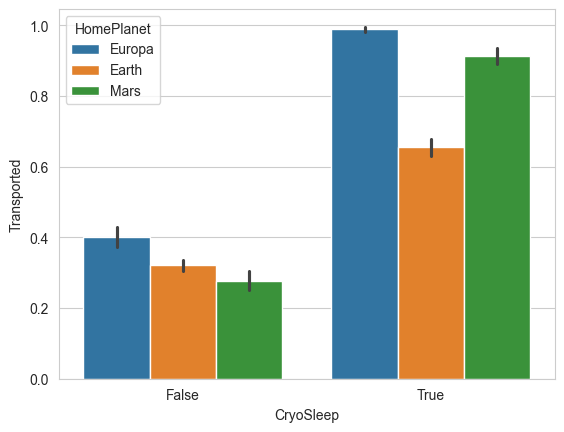

In [22]:
sns.barplot(df,x="CryoSleep",y="Transported",hue="HomePlanet")

<Axes: xlabel='Transported', ylabel='Age'>

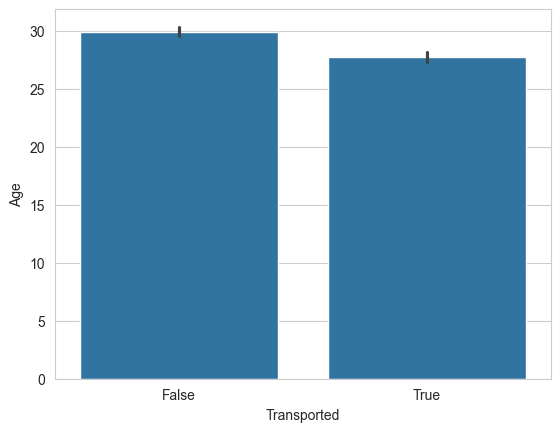

In [23]:
sns.barplot(df,x="Transported",y="Age")

<Axes: xlabel='HomePlanet', ylabel='Age'>

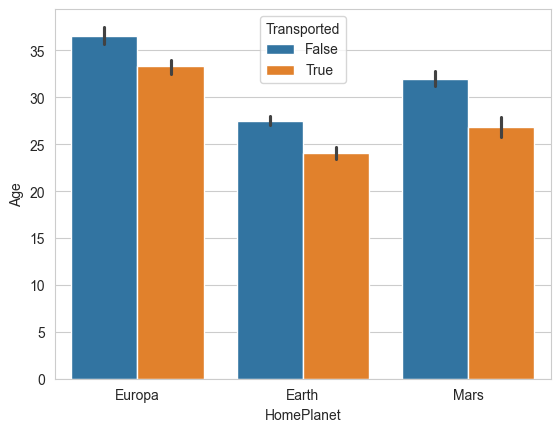

In [24]:
sns.barplot(df,x="HomePlanet",y="Age",hue="Transported")

<Axes: xlabel='VIP', ylabel='count'>

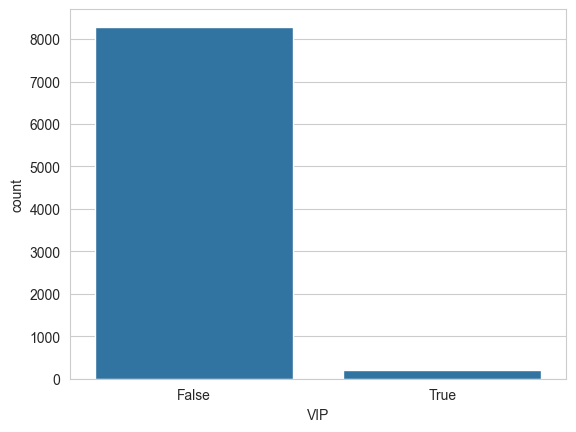

In [25]:
sns.countplot(df,x="VIP")

<Axes: xlabel='VIP', ylabel='Transported'>

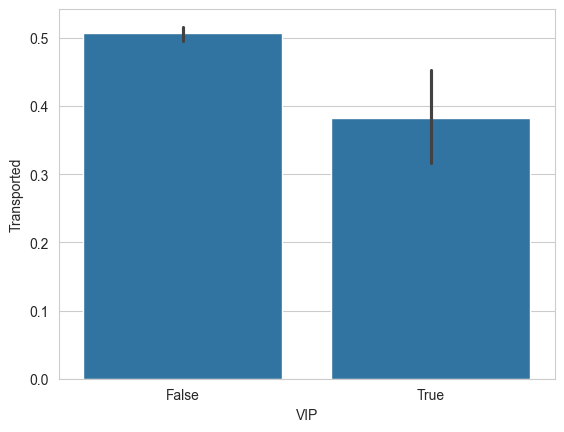

In [26]:
sns.barplot(df,x="VIP",y="Transported")

<Axes: xlabel='VIP', ylabel='Transported'>

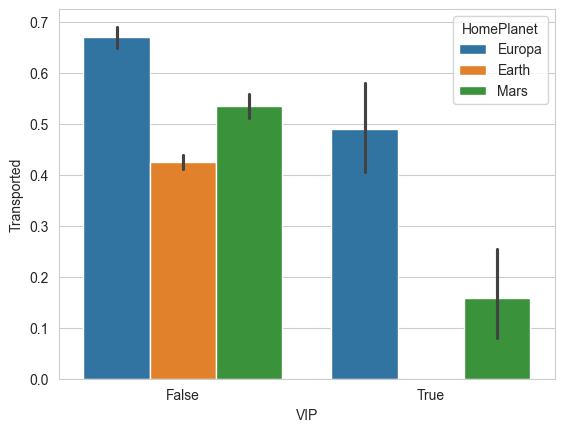

In [27]:
sns.barplot(df, x="VIP", y="Transported",hue="HomePlanet")

<Axes: xlabel='Destination', ylabel='count'>

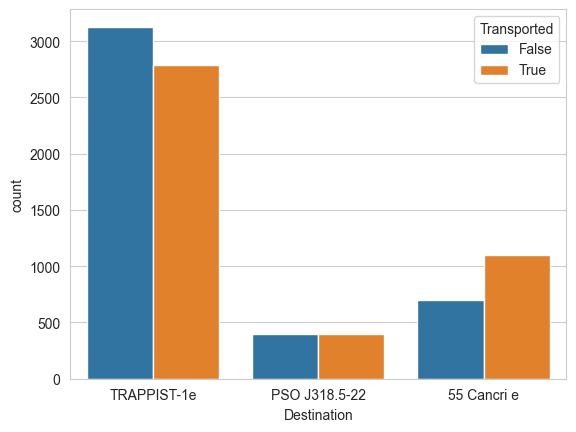

In [28]:
sns.countplot(df,x="Destination",hue="Transported")

<Axes: xlabel='Destination', ylabel='Transported'>

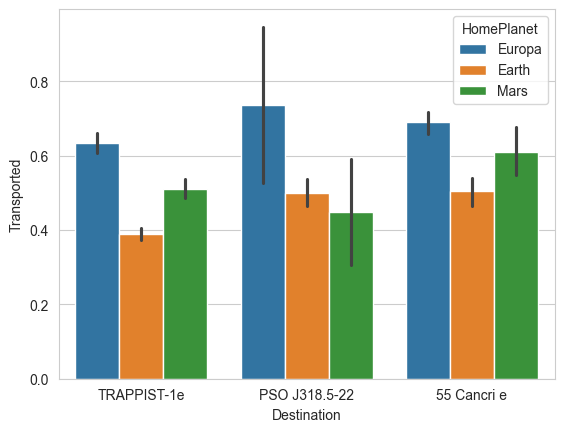

In [29]:
sns.barplot(df, x="Destination", y="Transported",hue="HomePlanet")

<Axes: xlabel='Deck', ylabel='Transported'>

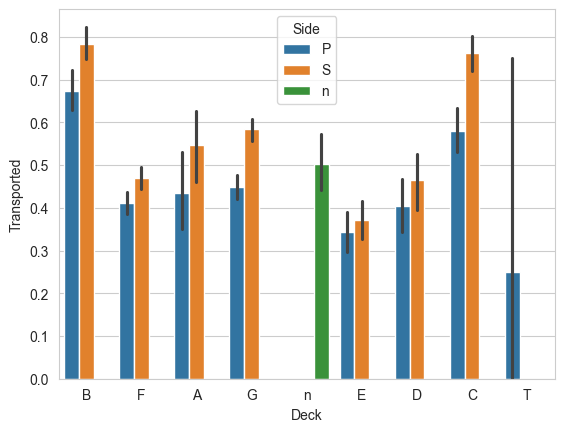

In [30]:
sns.barplot(df,x="Deck",y="Transported",hue="Side")

<Axes: xlabel='Side', ylabel='Transported'>

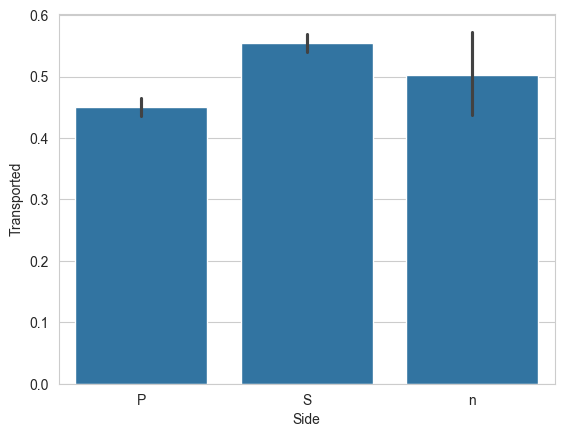

In [31]:
sns.barplot(df,x="Side",y="Transported")

<Axes: xlabel='IsGroupFamilyOnly', ylabel='Transported'>

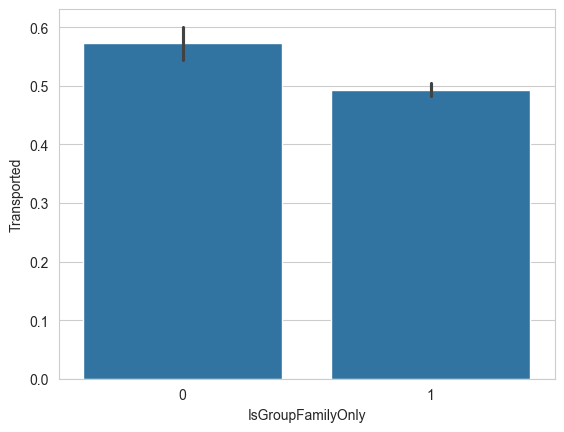

In [32]:
sns.barplot(df,x="IsGroupFamilyOnly",y="Transported")

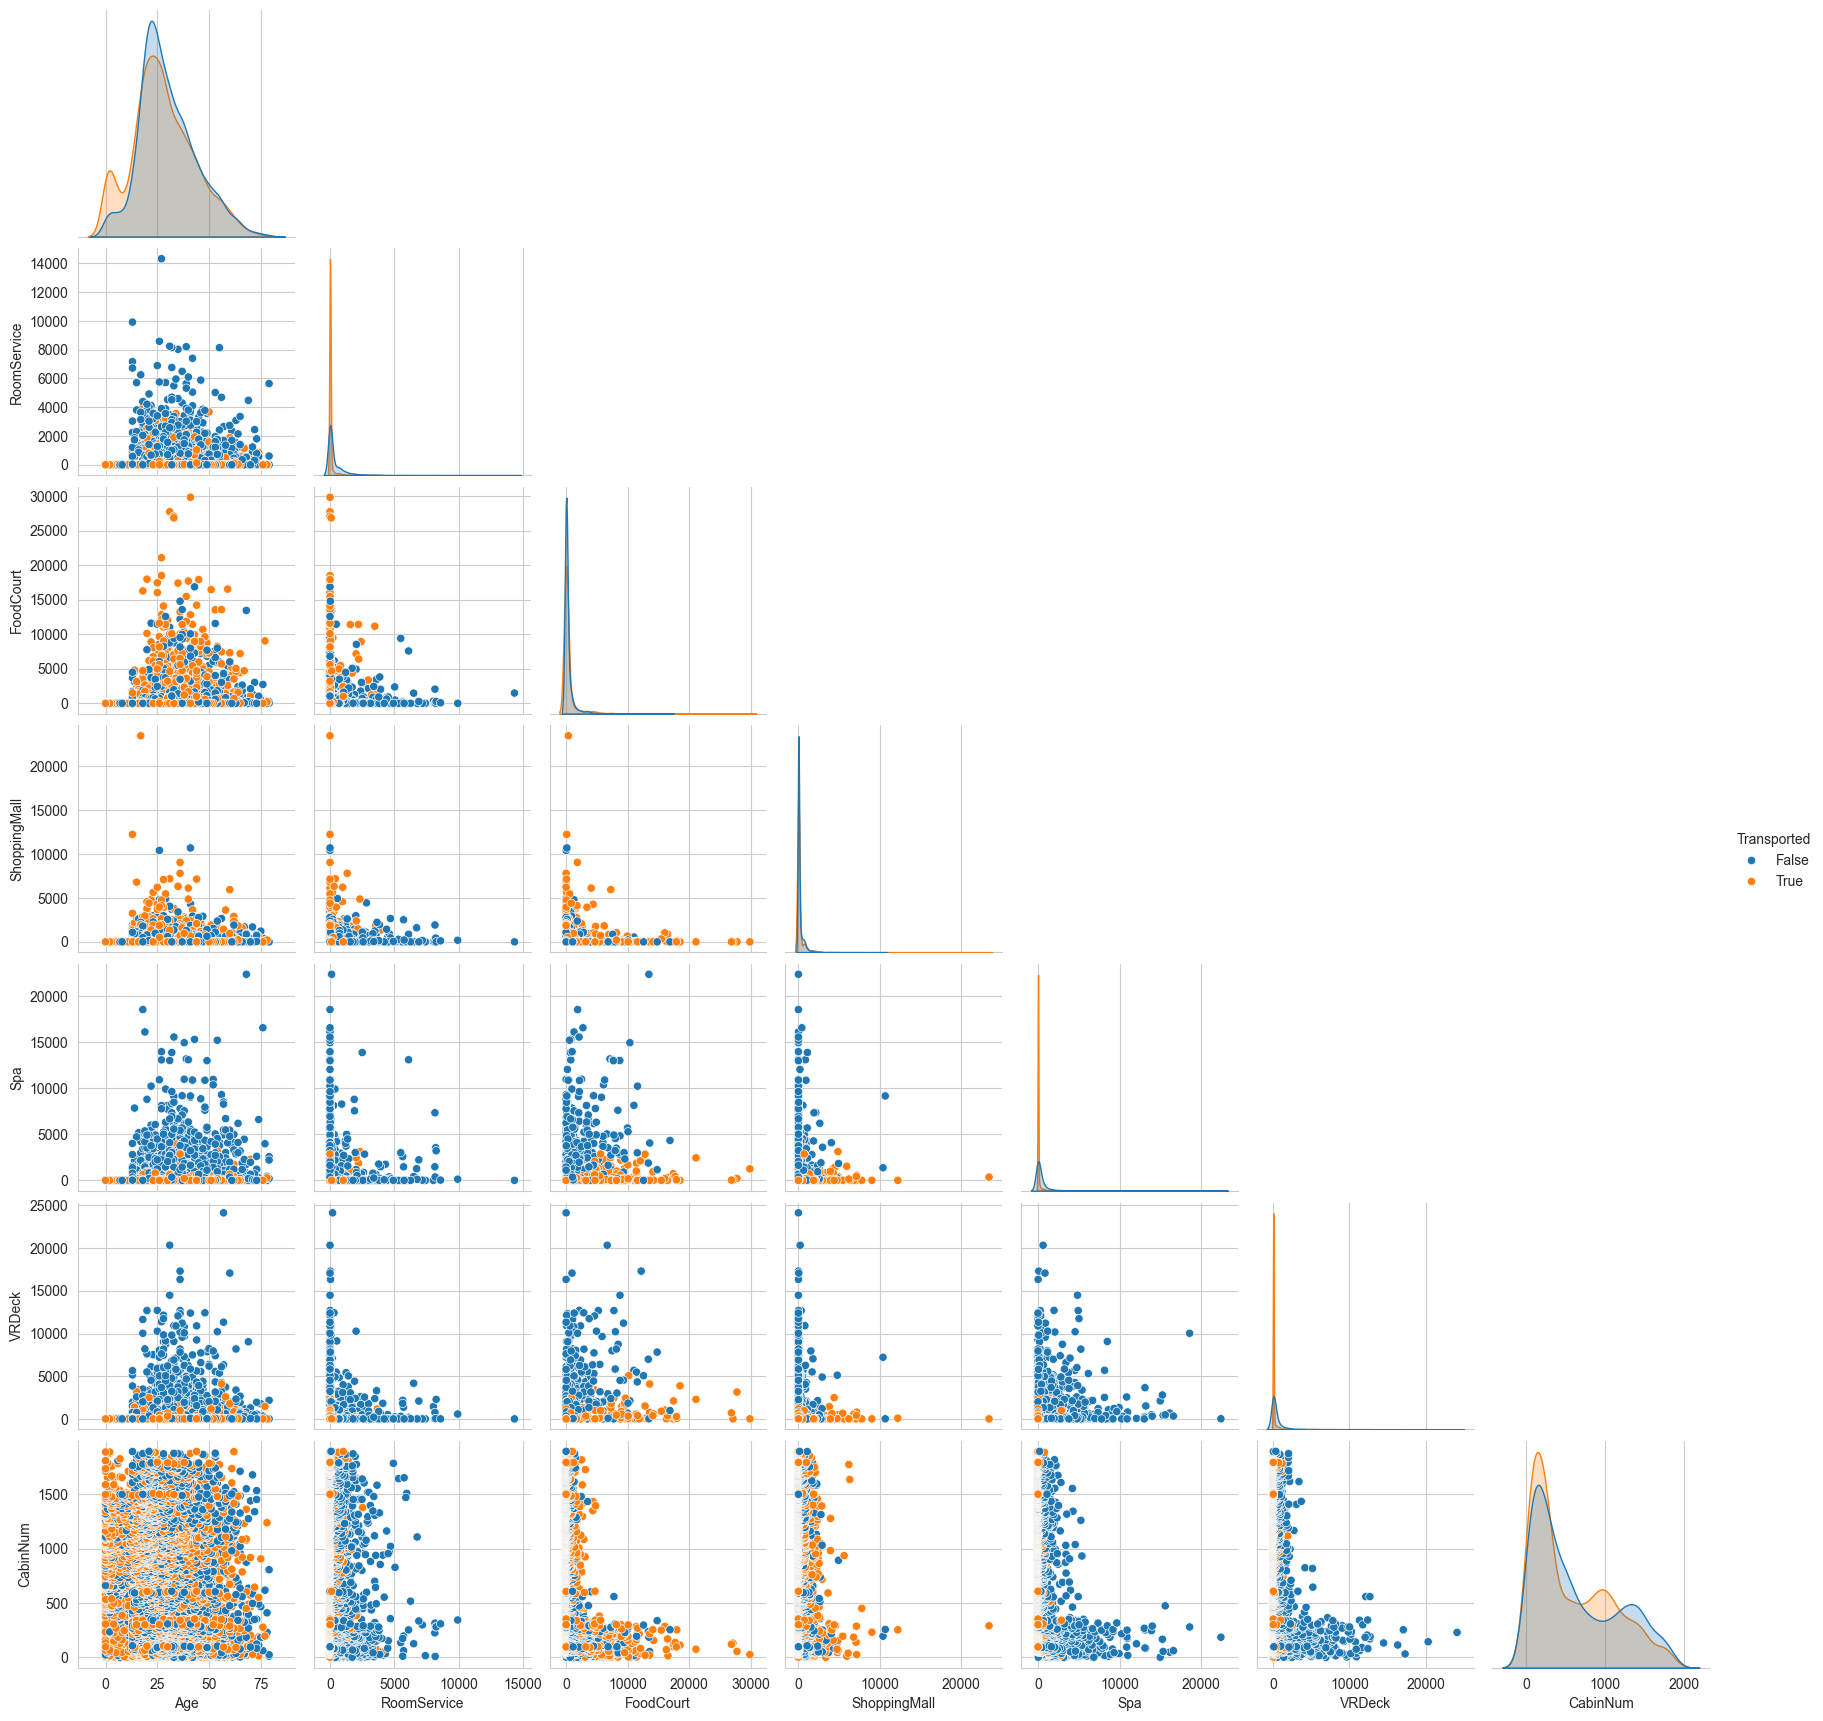

In [36]:
sns.pairplot(num_cols,hue="Transported",corner=True)

EDA Notes:

younger people tend to be more transported overall

the distribution between each 300 cabin number tend to change

If they're in CryoSleep, older folks are more transported(combination of CryoSleep and Age) - wasn't useful

VIP huge impact

Combination of VIP and HomePlanet - wasn't helpful

Combination of Destination and HomePlanet 

Get Deck and Side from Cabin

Side extremely important

test a combination of Deck and Side

Create a Group column from passengerId and mean encode it - it wasnt helpful

check if all Group members are Family members - it wasnt helpful

create a total spend feature